#   Association Rule Mining
##  Apriori Algorithm
### Santiago Ospina Ferreira

###### Analysis inspired from https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis/notebook
--------

## Importing Libraries

In [1]:
%pip install apyori


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from apyori import apriori
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 
import numpy as np 

## Loading Data 

Dataset obtained from Kaggle

Study case inspired from Kaggle post

In [3]:
df = pd.read_csv('marketBasketData.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transactions = []

for i in range(len(df)):
    rowValues = df.iloc[i, :].dropna().tolist()
    transactions.append(rowValues)

In [6]:
# Testing the first 5 transactions

for i in range(5):
    print(f"Transaction {i+1}: {transactions[i]}")

Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
Transaction 2: ['burgers', 'meatballs', 'eggs']
Transaction 3: ['chutney']
Transaction 4: ['turkey', 'avocado']
Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [7]:
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)

# min_support = 0.003 -> support >= 0.3%
# min_confidance = 0.2 -> confidence >= 20% 
# min_lift = 3 -> lift >= 3  
# min_length = 2 -> minimum # of items per transaction >= 2

In [8]:
rules

<generator object apriori at 0x15a86adc0>

In [9]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [10]:
dfResults = pd.DataFrame(results)

In [11]:
dfResults.head()

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."


In [12]:
support = dfResults.support

In [13]:
# LHS means left-hand side and RHS means right-hand side of the association rule

lhsValues = []
rhsValues = []
confidenceValues = []
liftValues = []

for i in range(dfResults.shape[0]):

    # iterate through each row of the dataframe
    singleList = dfResults['ordered_statistics'][i][0]

    # append values to each respective list given its position
    lhsValues.append(list(singleList[0]))
    rhsValues.append(list(singleList[1]))
    confidenceValues.append(singleList[2])
    liftValues.append(singleList[3])

In [14]:
lhs = pd.DataFrame(lhsValues)
rhs = pd.DataFrame(rhsValues)

confidence = pd.DataFrame(confidenceValues,columns=['Confidence'])

lift = pd.DataFrame(liftValues,columns=['lift'])

In [15]:
dfFinal = pd.concat([lhs, rhs, support, confidence, lift], axis=1)
dfFinal.head()

,0,1,2,0,1,support,Confidence,lift
0,light cream,None,None,chicken,None,0.004533,0.290598,4.843951
1,mushroom cream sauce,None,None,escalope,None,0.005733,0.300699,3.790833
2,pasta,None,None,escalope,None,0.005866,0.372881,4.700812
3,fromage blanc,None,None,honey,None,0.003333,0.245098,5.164271
4,herb & pepper,None,None,ground beef,None,0.015998,0.323450,3.291994


In [16]:
dfFinal.fillna(value=' ', inplace=True)
dfFinal.head(20)

,0,1,2,0,1,support,Confidence,lift
0,light cream,,,chicken,,0.004533,0.290598,4.843951
1,mushroom cream sauce,,,escalope,,0.005733,0.300699,3.790833
2,pasta,,,escalope,,0.005866,0.372881,4.700812
3,fromage blanc,,,honey,,0.003333,0.245098,5.164271
4,herb & pepper,,,ground beef,,0.015998,0.323450,3.291994
5,tomato sauce,,,ground beef,,0.005333,0.377358,3.840659
6,light cream,,,olive oil,,0.003200,0.205128,3.114710
7,whole wheat pasta,,,olive oil,,0.007999,0.271493,4.122410
8,pasta,,,shrimp,,0.005066,0.322034,4.506672
9,avocado,spaghetti,,milk,,0.003333,0.416667,3.215449


In [17]:
dfFinal.columns = ['lhs',1,'rhs',2,3,'support','confidence','lift']
dfFinal.head(20)

,lhs,1,rhs,2,3,support,confidence,lift
0,light cream,,,chicken,,0.004533,0.290598,4.843951
1,mushroom cream sauce,,,escalope,,0.005733,0.300699,3.790833
2,pasta,,,escalope,,0.005866,0.372881,4.700812
3,fromage blanc,,,honey,,0.003333,0.245098,5.164271
4,herb & pepper,,,ground beef,,0.015998,0.323450,3.291994
5,tomato sauce,,,ground beef,,0.005333,0.377358,3.840659
6,light cream,,,olive oil,,0.003200,0.205128,3.114710
7,whole wheat pasta,,,olive oil,,0.007999,0.271493,4.122410
8,pasta,,,shrimp,,0.005066,0.322034,4.506672
9,avocado,spaghetti,,milk,,0.003333,0.416667,3.215449


In [18]:
dfFinal['lhs'] = dfFinal['lhs'] + str(", ") + dfFinal[1]
dfFinal['rhs'] = dfFinal['rhs'] + str(", ") + dfFinal[2] + str(", ") + dfFinal[3]

dfFinal.head()

,lhs,1,rhs,2,3,support,confidence,lift
0,"light cream,",,", chicken,",chicken,,0.004533,0.290598,4.843951
1,"mushroom cream sauce,",,", escalope,",escalope,,0.005733,0.300699,3.790833
2,"pasta,",,", escalope,",escalope,,0.005866,0.372881,4.700812
3,"fromage blanc,",,", honey,",honey,,0.003333,0.245098,5.164271
4,"herb & pepper,",,", ground beef,",ground beef,,0.015998,0.323450,3.291994


In [19]:
dfFinal.drop(columns=[1,2,3],inplace=True)
dfFinal.head()

,lhs,rhs,support,confidence,lift
0,"light cream,",", chicken,",0.004533,0.290598,4.843951
1,"mushroom cream sauce,",", escalope,",0.005733,0.300699,3.790833
2,"pasta,",", escalope,",0.005866,0.372881,4.700812
3,"fromage blanc,",", honey,",0.003333,0.245098,5.164271
4,"herb & pepper,",", ground beef,",0.015998,0.323450,3.291994


In [20]:
sortedFinalDf = dfFinal.sort_values('lift', ascending=False)

sortedFinalDf.head(20)

,lhs,rhs,support,confidence,lift
70,"frozen vegetables, soup",", milk, mineral water",0.003066,0.383333,7.987176
69,"frozen vegetables, olive oil",", milk, mineral water",0.003333,0.294118,6.128268
52,"whole wheat pasta, mineral water",", olive oil,",0.003866,0.402778,6.115863
44,"tomato sauce,",", spaghetti, ground beef",0.003066,0.216981,5.535971
3,"fromage blanc,",", honey,",0.003333,0.245098,5.164271
0,"light cream,",", chicken,",0.004533,0.290598,4.843951
2,"pasta,",", escalope,",0.005866,0.372881,4.700812
24,"ground beef, french fries",", herb & pepper,",0.003200,0.230769,4.665768
61,"frozen vegetables, chocolate","mineral water, shrimp,",0.003200,0.328767,4.600900
66,"frozen vegetables, ground beef",", milk, mineral water",0.003733,0.220472,4.593788


## Experimenting With Plots 

Work in progress

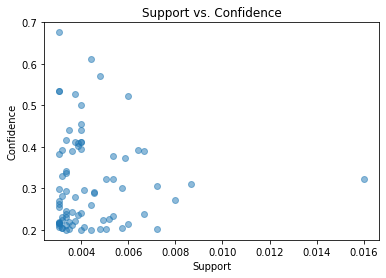

In [25]:
df = sortedFinalDf

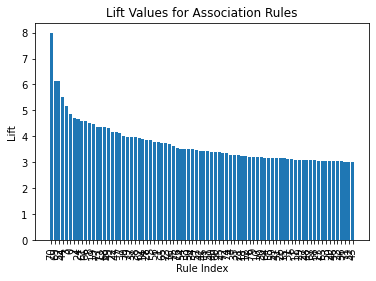

In [26]:
# Lift Bar Chart
plt.bar(range(len(df)), df['lift'])
plt.xticks(range(len(df)), df.index, rotation=90)
plt.xlabel('Rule Index')
plt.ylabel('Lift')
plt.title('Lift Values for Association Rules')
plt.show()

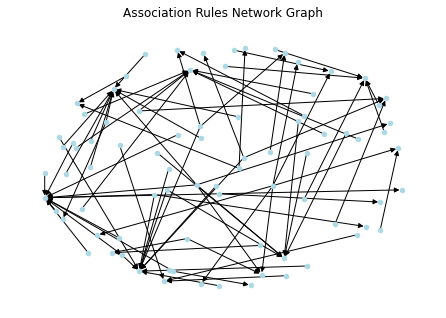

In [34]:
# Network Graph
G = nx.DiGraph()

# Add nodes (LHS and RHS items)
for index, row in df.iterrows():
    G.add_node(row['lhs'])
    G.add_node(row['rhs'])
    G.add_edge(row['lhs'], row['rhs'], weight=row['support'])

# Customize the network graph layout
pos = nx.spring_layout(G)

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=False, node_size=20, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'weight')
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# nx.draw_networkx_edge_labels(G, pos)

plt.title('Association Rules Network Graph')
plt.show()

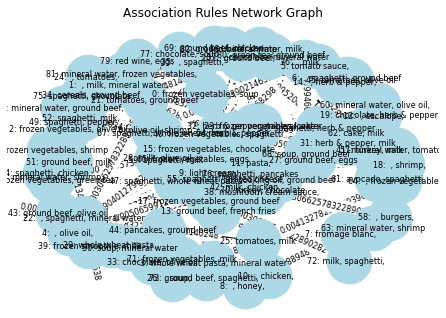

In [35]:
# Create a mapping of item combinations to shorter names
short_names = {}
short_name_counter = 0

for index, row in df.iterrows():
    lhs = row['lhs']
    rhs = row['rhs']
    if lhs not in short_names:
        short_names[lhs] = str(short_name_counter) + ": " + lhs
        short_name_counter += 1
    if rhs not in short_names:
        short_names[rhs] = str(short_name_counter) + ": " + rhs
        short_name_counter += 1

# Update the DataFrame with shorter names
df['lhs'] = df['lhs'].map(short_names)
df['rhs'] = df['rhs'].map(short_names)

# Create a network graph with shorter names
G = nx.DiGraph()

# Add nodes (LHS and RHS items)
for index, row in df.iterrows():
    G.add_node(row['lhs'])
    G.add_node(row['rhs'])
    G.add_edge(row['lhs'], row['rhs'], weight=row['support'])

# Customize the network graph layout
pos = nx.spring_layout(G)

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=8)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.title('Association Rules Network Graph')
plt.show()


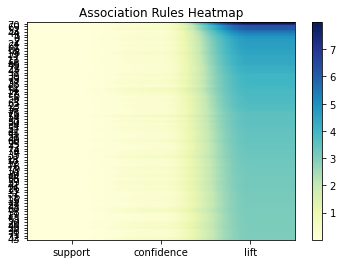

In [28]:
# Heatmap
heatmap_data = df[['support', 'confidence', 'lift']]
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index)
plt.colorbar()
plt.title('Association Rules Heatmap')
plt.show()